<a href="https://colab.research.google.com/github/aasem/cvision2025/blob/main/curse_dimensionality_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Curse of Dimensionality and Its Impact on KNN

The **Curse of Dimensionality** refers to various phenomena that arise when working with data in high-dimensional spaces. In the context of machine learning — especially **K-Nearest Neighbors (KNN)** — it becomes increasingly difficult to identify meaningful neighbors as the number of dimensions increases.

In this notebook, we'll:
1. Visualize how distances behave in high-dimensional space.
2. Understand why KNN fails in high dimensions.
3. Discuss how to mitigate these effects.

## 1. Simulating Distance Behavior in High Dimensions
Let's explore how distances to neighbors behave as dimensionality increases.

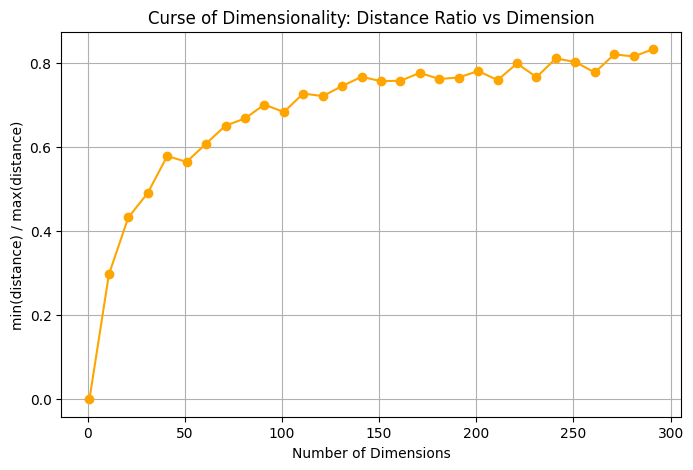

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate distances in different dimensions
np.random.seed(42)

dims = list(range(1, 301, 10))  # Dimensions from 1 to 300
n_points = 1000
min_max_ratios = []

for d in dims:
    # Generate 1000 random points in [0, 1]^d
    data = np.random.rand(n_points, d)
    query = np.random.rand(1, d)

    # Compute Euclidean distances from query to all points
    dists = np.linalg.norm(data - query, axis=1)

    # Ratio of min to max distance
    min_dist = np.min(dists)
    max_dist = np.max(dists)
    ratio = min_dist / max_dist
    min_max_ratios.append(ratio)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(dims, min_max_ratios, marker='o', color='orange')
plt.title("Curse of Dimensionality: Distance Ratio vs Dimension")
plt.xlabel("Number of Dimensions")
plt.ylabel("min(distance) / max(distance)")
plt.grid(True)
plt.show()

## 2. Why This Hurts KNN

KNN relies on the idea that:
> *Closer points are more similar.*

But in high-dimensional space:
- All distances become nearly the same.
- The difference between the nearest and farthest neighbor shrinks.
- KNN ends up choosing neighbors that are **not truly close or relevant**.

## 3. Visualizing the Curse (Intuition)

As dimensionality increases, space "expands" faster than the number of points can fill it:

- In 1D: Easy to find close neighbors.
- In 2D: Points spread out.
- In 3D+: Space becomes sparser, most points become distant.

This means KNN suffers unless you:
- Reduce the number of dimensions (e.g., with PCA).
- Use more robust distance measures.
- Choose models better suited for high-D data.

## 4. Conclusion

The Curse of Dimensionality is real and problematic for algorithms like KNN. As dimensionality increases:
- Data becomes sparse.
- Distance metrics become less discriminative.
- KNN can fail to find meaningful neighbors.

### ✅ Tips:
- Use feature selection or dimensionality reduction.
- Visualize and analyze distances before trusting KNN in high dimensions.